<a href="https://colab.research.google.com/github/JulyoJ/Aprendizado-de-maquina/blob/master/Atividade_I%20e%20II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [133]:
import numpy as np
import pandas as pd

In [134]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Aprendizado/Semana1/datasets/reconhecimento_de_genero_por_voz.csv')
dados.head ()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [135]:
dados.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [136]:
dados = dados.dropna()

In [137]:
dados = dados.drop (columns=['sd'])
dados.head()

,meanfreq,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [138]:
dados['label'] = dados['label'].replace(['male','female'],[1,0])
dados.head(30)


,meanfreq,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
5,0.132786,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1
6,0.150762,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,1
7,0.160514,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,1
8,0.142239,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,1
9,0.134329,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,1


In [139]:
import matplotlib.pyplot as plt


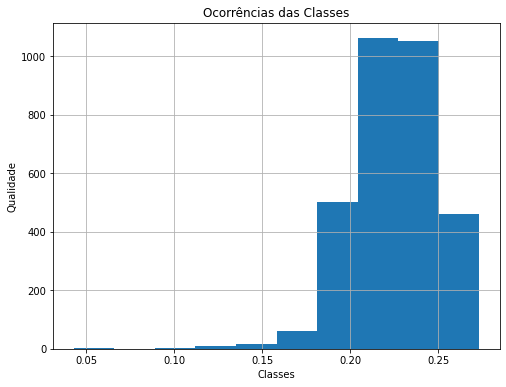

In [140]:
plt.hist(dados['Q75'])
plt.xlabel('Classes')
plt.ylabel('Qualidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

In [141]:
print('Masculino:',dados[dados['label']==0].shape[0])
print('Masculina:',dados[dados['label']==1].shape[0])


Masculino: 1584
Masculina: 1584


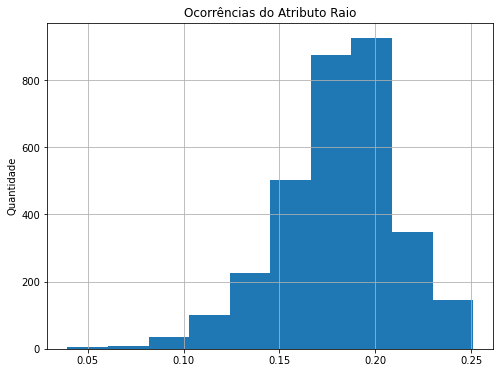

In [142]:
plt.hist(dados['centroid'],10)
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo Raio')
plt.grid(True)
plt.show()

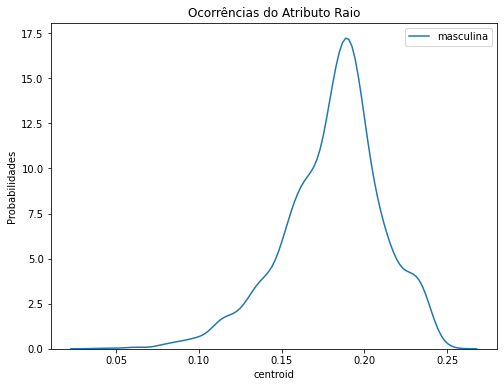

In [143]:
import seaborn as sns

sns.distplot(dados.centroid, hist=False, rug=False,label='masculina')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo Raio')
plt.show()


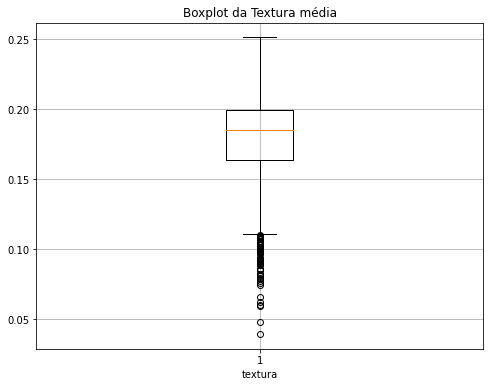

In [144]:
plt.boxplot(dados.meanfreq)
plt.title('Boxplot da Textura média')
plt.xlabel ('textura')
plt.grid()
plt.show()

In [145]:
masculino = dados[dados['label']==0].drop(columns=['label']).reset_index(drop=True)


In [146]:
masculina = dados[dados['label']==1].drop(columns=['label']).reset_index(drop=True)

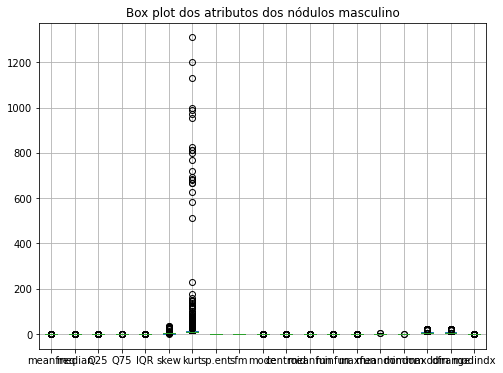

In [147]:
masculino.boxplot()
plt.title('Box plot dos atributos dos nódulos masculino')
plt.show()

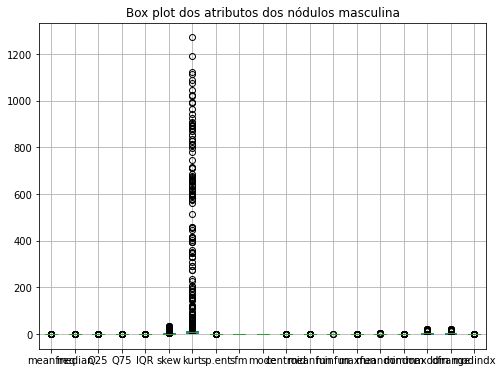

In [148]:
masculina.boxplot()
plt.title('Box plot dos atributos dos nódulos masculina')
plt.show()

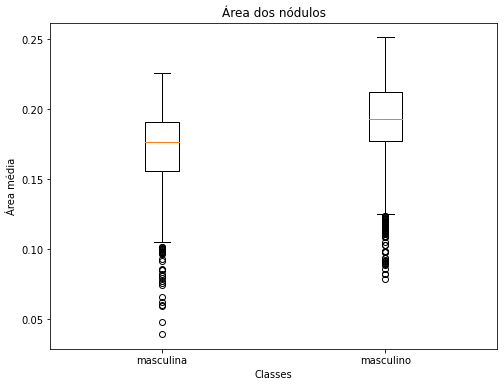

In [149]:
plt.boxplot([masculina.centroid,masculino.centroid],labels=['masculina','masculino'])
plt.xlabel('Classes')
plt.ylabel('Área média')
plt.title('Área dos nódulos')
plt.show()

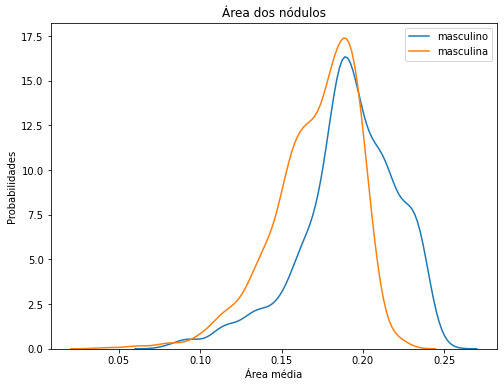

In [150]:
sns.distplot(masculino.centroid, hist=False, rug=False,label='masculino')
sns.distplot(masculina.centroid, hist=False, rug=False,label='masculina')
plt.xlabel('Área média')
plt.ylabel('Probabilidades')
plt.title('Área dos nódulos')
plt.show()

In [151]:
X = dados.iloc[:,1:]
X.head()

,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [152]:
y = dados.label
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [155]:
X_train.head()

,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1162,0.213032,0.133936,0.260490,0.126554,2.143668,7.633526,0.900847,0.432467,0.129718,0.197103,0.127859,0.049281,0.279070,1.779983,0.023438,9.820312,9.796875,0.145652,1
3090,0.170873,0.163971,0.185237,0.021266,8.484735,94.079451,0.859377,0.429826,0.169194,0.163946,0.151182,0.040650,0.192308,0.176532,0.170898,0.209961,0.039062,0.140000,0
7,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,1
2269,0.233846,0.204615,0.258077,0.053462,1.339288,3.605846,0.860543,0.197276,0.261154,0.227537,0.181804,0.047714,0.279070,1.158353,0.023438,9.773438,9.750000,0.069368,0
476,0.215518,0.135240,0.254034,0.118794,1.653476,5.663781,0.915695,0.434247,0.269397,0.195274,0.125527,0.018757,0.258065,0.990885,0.046875,6.601562,6.554688,0.152292,1


In [156]:
y_train.head()

1162    1
3090    0
7       1
2269    0
476     1
Name: label, dtype: int64

In [157]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
classificador = DecisionTreeClassifier ()

In [159]:
classificador.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [160]:
from sklearn.tree import plot_tree

In [161]:
plt.rcParams["figure.figsize"] = (30,20)

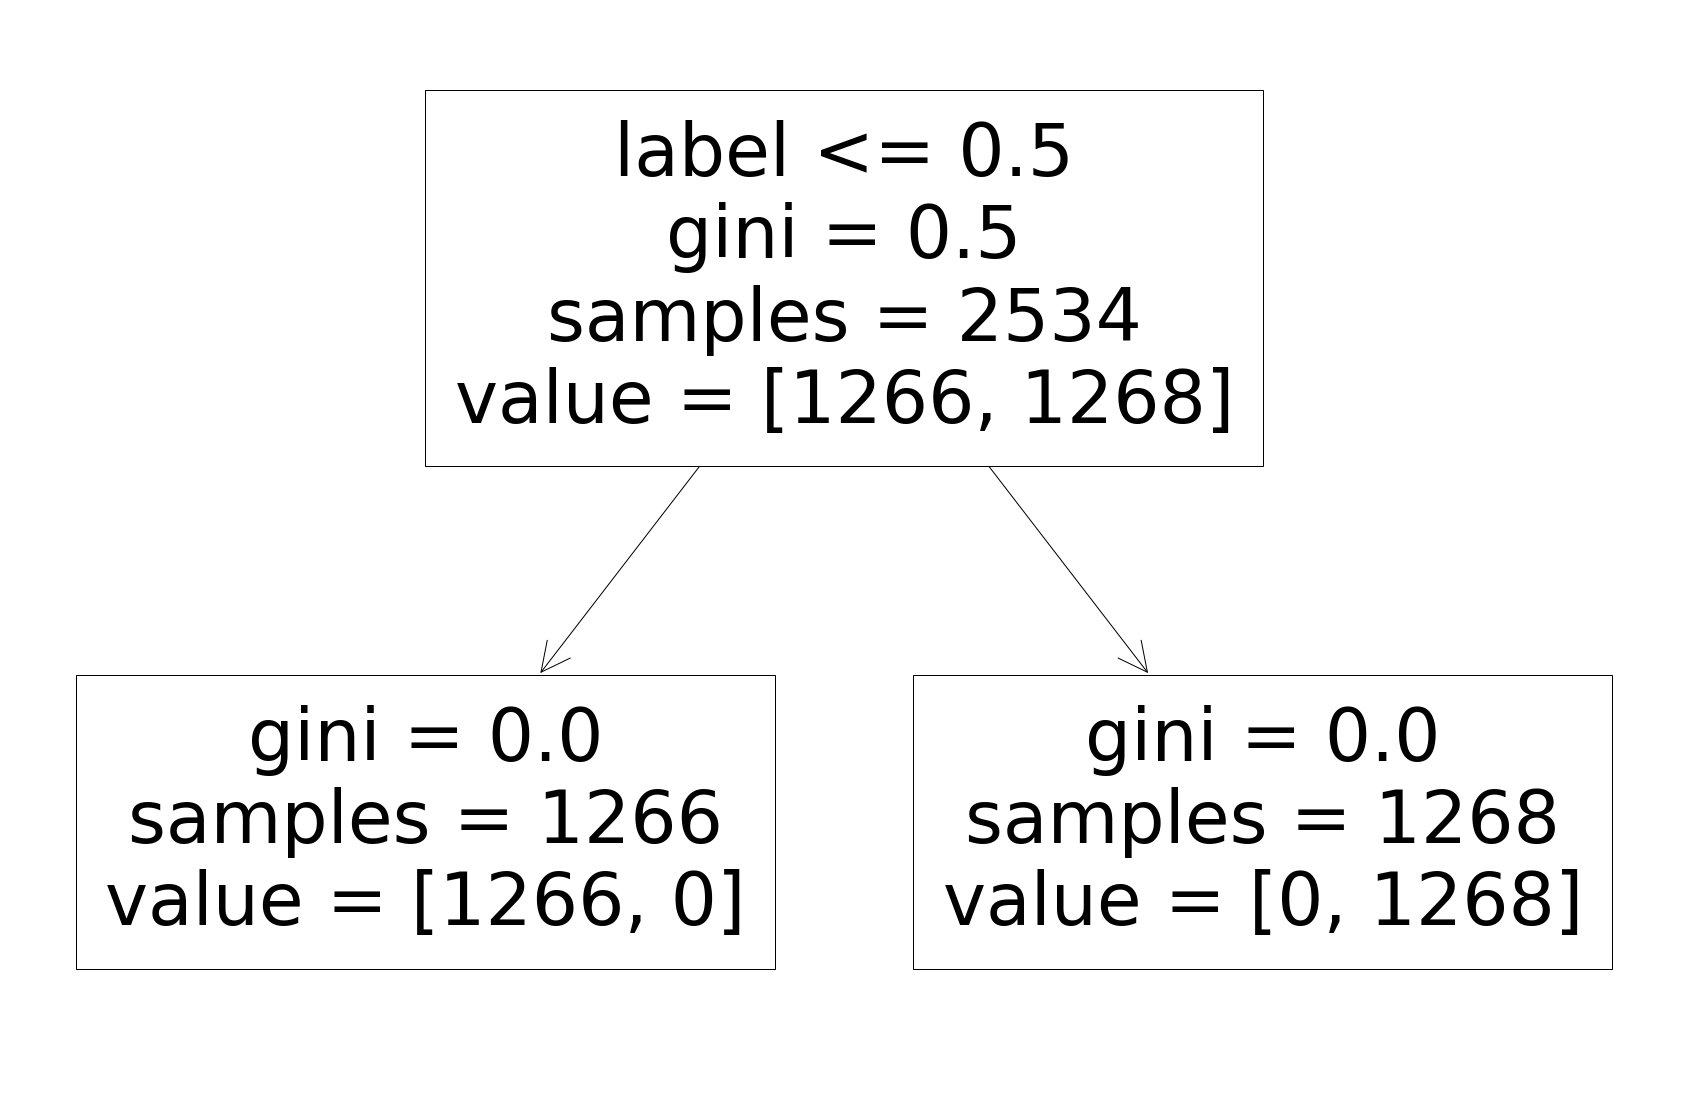

In [162]:
plot_tree(classificador,feature_names=dados.columns[1:])
plt.show()

In [163]:
plt.rcParams["figure.figsize"] = (8,6)

In [164]:
classificacao = classificador.predict(X_test)
classificacao

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [165]:
for i in range (len(y_test)):
  print(y_test.iloc[i],'\t',classificacao[i])

0 	 0
1 	 1
0 	 0
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
0 	 0
0 	 0
0 	 0
1 	 1
0 	 0
0 	 0
0 	 0
0 	 0
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
0 	 0
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
0 	 0
0 	 0
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
1 	 1
0 	 0
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
0 	 0
1 	 1
0 	 0
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
0 	 0
1 	 

In [166]:
from sklearn.metrics import accuracy_score

In [167]:
acuracia = accuracy_score(y_test,classificacao)
acuracia
      

1.0

In [168]:
from sklearn.metrics import precision_score

In [169]:
precisao = precision_score(y_test,classificacao)
precisao
                           

1.0

In [170]:
from sklearn.metrics import recall_score

In [171]:
recall = recall_score (y_test, classificacao)

In [172]:
from sklearn.metrics import f1_score

In [173]:
f1 = f1_score (y_test,classificacao)
f1

1.0

In [174]:
from sklearn.metrics import roc_curve

In [175]:
fpr, tpr, _ = roc_curve (y_test,classificacao)

In [176]:
fpr

array([0., 0., 1.])

In [177]:
tpr

array([0., 1., 1.])

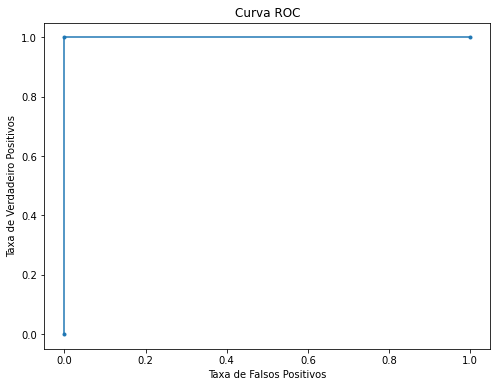

In [178]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

In [179]:
from sklearn.metrics import roc_auc_score

In [180]:
erro = roc_auc_score(y_test,classificacao)
erro

1.0

In [181]:
from sklearn.model_selection import KFold

In [182]:
kf = KFold(n_splits=5)

In [183]:
for train, test in kf.split(X):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [ 634  635  636 ... 3165 3166 3167] 
Teste: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233

In [184]:
from sklearn.model_selection import cross_val_score

In [185]:
classificador = DecisionTreeClassifier()

In [186]:
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [187]:
scores.mean(),scores.std()

(1.0, 0.0)

In [188]:
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [189]:
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
arvore.score(X_test,y_test)

1.0

In [191]:
floresta.score(X_train,y_train)

1.0

In [192]:
clf_arvore = arvore.predict(X_test)

In [193]:
clf_floresta = floresta.predict(X_test)

In [194]:
fpr_ar, tpr_ar, _ = roc_curve(y_test,clf_arvore)

In [195]:
#NÃO CONSEGUIR IDENTIFICAR O ERRO.

fpr_fl, tpr_fl, _ = roc_curve(y_test,clf_floreta)

NameError: ignored

Com a continuação da atividade pude vê que houve uma precisão muito alta ou até mesmo um erro. É algo raro, mas a acurácia foi bem precisa. Treino e teste validados.